In [26]:
import pandas as pd
import seaborn as sns
%pylab inline
figsize(10,8)

import sys
sys.path.append('../../scripts/')
from yandex_mipt_stat_tests import proportions_diff_z_stat_ind, \
                                    proportions_diff_z_test

Populating the interactive namespace from numpy and matplotlib


In [27]:
proportions_diff_z_stat_ind?

In [2]:
data = pd.read_csv('../../data/telecom_churn.csv')

In [3]:
data.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [21]:
data.columns

Index([u'State', u'Account length', u'Area code', u'International plan',
       u'Voice mail plan', u'Number vmail messages', u'Total day minutes',
       u'Total day calls', u'Total day charge', u'Total eve minutes',
       u'Total eve calls', u'Total eve charge', u'Total night minutes',
       u'Total night calls', u'Total night charge', u'Total intl minutes',
       u'Total intl calls', u'Total intl charge', u'Customer service calls',
       u'Churn', u'many service calls'],
      dtype='object')

In [4]:
data.shape

(3333, 20)

In [5]:
data['State'].nunique()

51

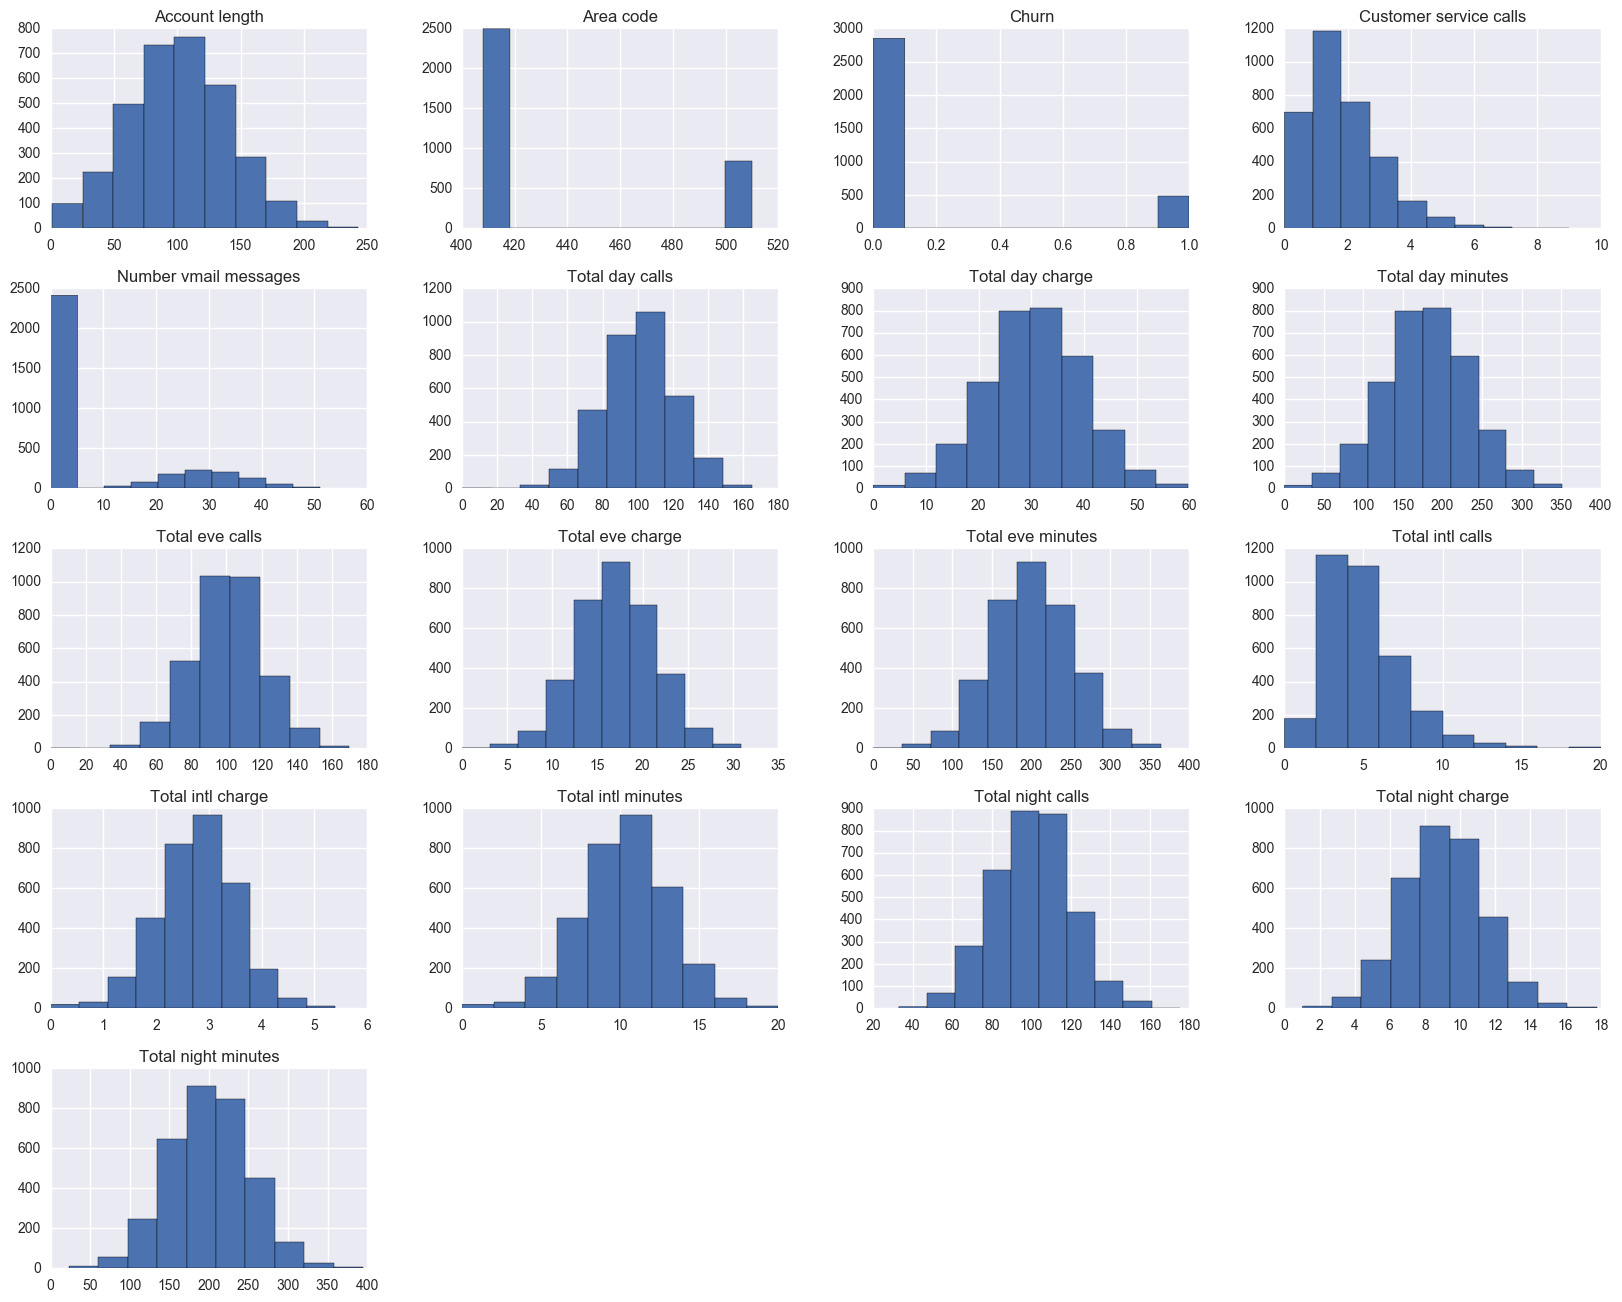

In [6]:
data.hist(figsize=(20, 16));

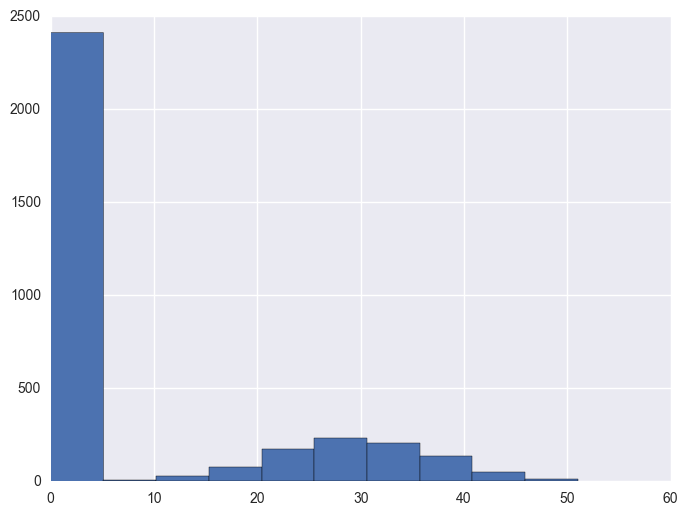

In [9]:
figsize(8,6)
data['Number vmail messages'].hist()

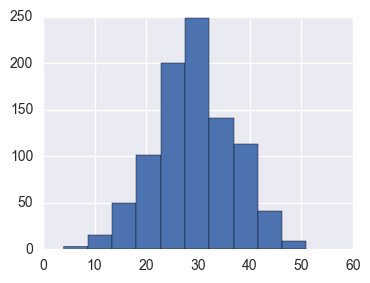

In [12]:
figsize(4,3)
data[data['Number vmail messages'] > 0]['Number vmail messages'].hist();

In [13]:
data.corr()

,Account length,Area code,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
Account length,1.000000,-0.012463,-0.004628,0.006216,0.038470,0.006214,-0.006757,0.019260,-0.006745,-0.008955,-0.013176,-0.008960,0.009514,0.020661,0.009546,-0.003796,0.016541
Area code,-0.012463,1.000000,-0.001994,-0.008264,-0.009646,-0.008264,0.003580,-0.011886,0.003607,-0.005825,0.016522,-0.005845,-0.018288,-0.024179,-0.018395,0.027572,0.006174
Number vmail messages,-0.004628,-0.001994,1.000000,0.000778,-0.009548,0.000776,0.017562,-0.005864,0.017578,0.007681,0.007123,0.007663,0.002856,0.013957,0.002884,-0.013263,-0.089728
Total day minutes,0.006216,-0.008264,0.000778,1.000000,0.006750,1.000000,0.007043,0.015769,0.007029,0.004323,0.022972,0.004300,-0.010155,0.008033,-0.010092,-0.013423,0.205151
Total day calls,0.038470,-0.009646,-0.009548,0.006750,1.000000,0.006753,-0.021451,0.006462,-0.021449,0.022938,-0.019557,0.022927,0.021565,0.004574,0.021666,-0.018942,0.018459
Total day charge,0.006214,-0.008264,0.000776,1.000000,0.006753,1.000000,0.007050,0.015769,0.007036,0.004324,0.022972,0.004301,-0.010157,0.008032,-0.010094,-0.013427,0.205151
Total eve minutes,-0.006757,0.003580,0.017562,0.007043,-0.021451,0.007050,1.000000,-0.011430,1.000000,-0.012584,0.007586,-0.012593,-0.011035,0.002541,-0.011067,-0.012985,0.092796
Total eve calls,0.019260,-0.011886,-0.005864,0.015769,0.006462,0.015769,-0.011430,1.000000,-0.011423,-0.002093,0.007710,-0.002056,0.008703,0.017434,0.008674,0.002423,0.009233
Total eve charge,-0.006745,0.003607,0.017578,0.007029,-0.021449,0.007036,1.000000,-0.011423,1.000000,-0.012592,0.007596,-0.012601,-0.011043,0.002541,-0.011074,-0.012987,0.092786
Total night minutes,-0.008955,-0.005825,0.007681,0.004323,0.022938,0.004324,-0.012584,-0.002093,-0.012592,1.000000,0.011204,0.999999,-0.015207,-0.012353,-0.015180,-0.009288,0.035493


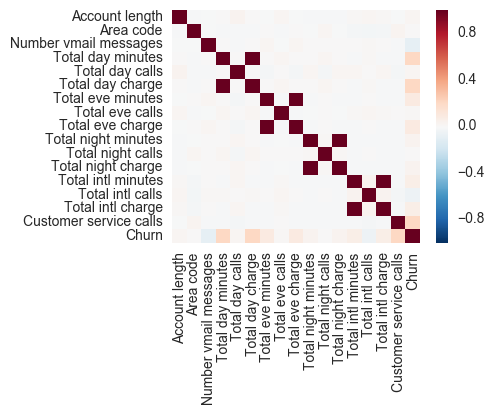

In [14]:
sns.heatmap(data.corr())

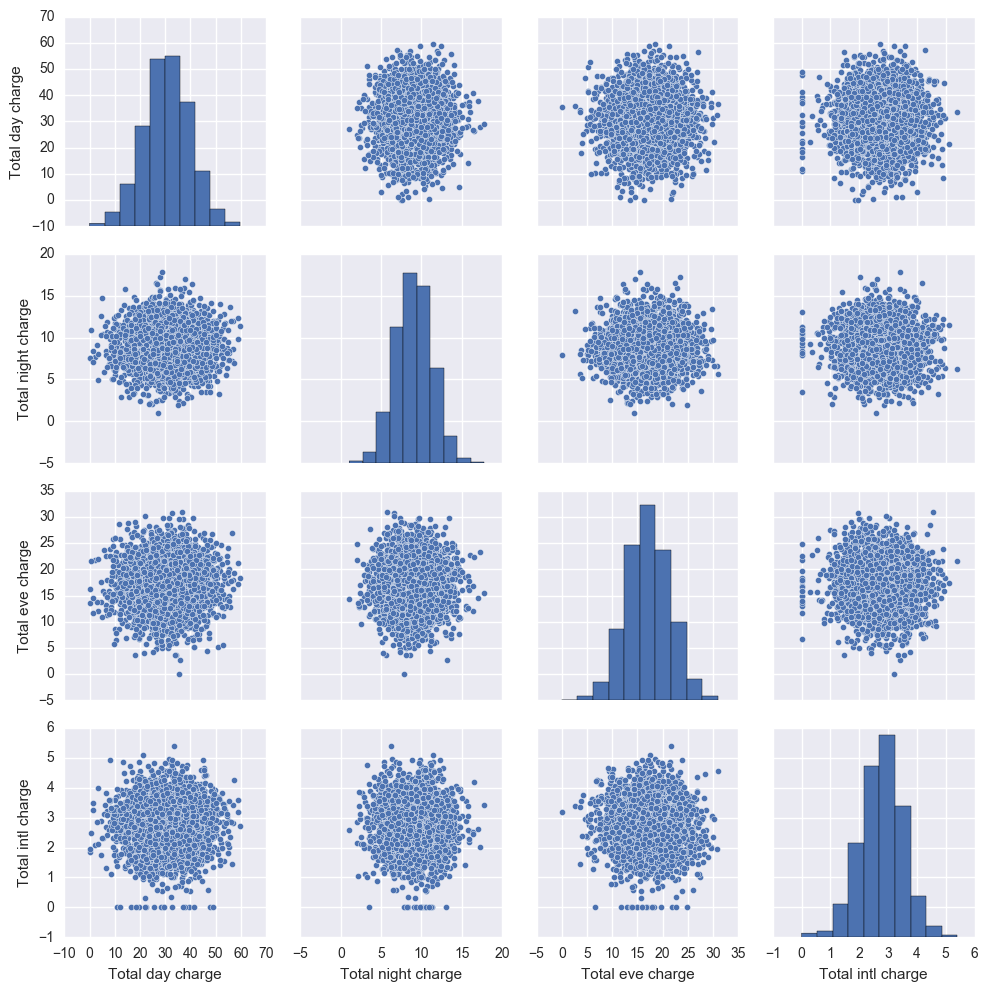

In [15]:
sns.pairplot(data[['Total day charge', 'Total night charge',
                  'Total eve charge', 'Total intl charge']]);

In [16]:
data['Churn'].value_counts()

False    2850
True      483
Name: Churn, dtype: int64

In [17]:
pd.crosstab(data['International plan'], data['Churn'])

Churn,False,True
International plan,,
No,2664,346
Yes,186,137


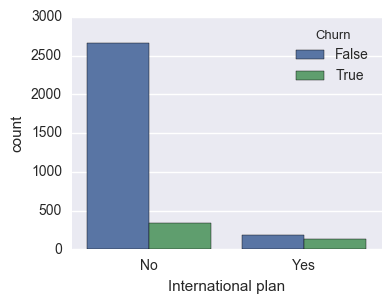

In [18]:
sns.countplot(x='International plan', hue='Churn', data=data)

In [32]:
churn_with_roaming = data[data['International plan'] == 'Yes']['Churn']
churn_no_roaming = data[data['International plan'] == 'No']['Churn']

In [35]:
z_stat = proportions_diff_z_stat_ind(churn_with_roaming, churn_no_roaming)

In [36]:
proportions_diff_z_test(z_stat, alternative='greater')

0.0

In [31]:
churn_with_roaming

Series([], Name: Churn, dtype: bool)

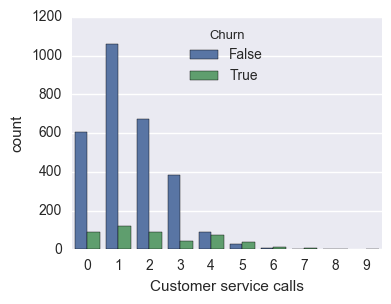

In [19]:
sns.countplot(x='Customer service calls', hue='Churn', data=data)

In [20]:
data['many service calls'] = (data['Customer service calls'] 
                              > 3).astype('int')

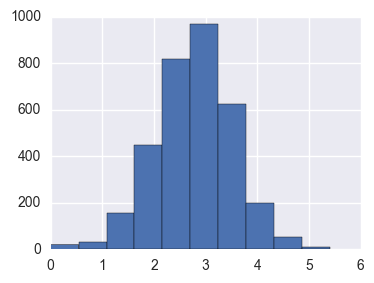

In [22]:
data['Total intl charge'].hist()

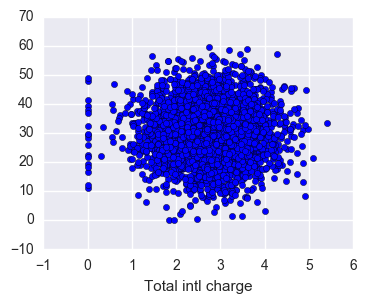

In [24]:
scatter(data['Total intl charge'], data['Total day charge'])
xlabel('Total intl charge')

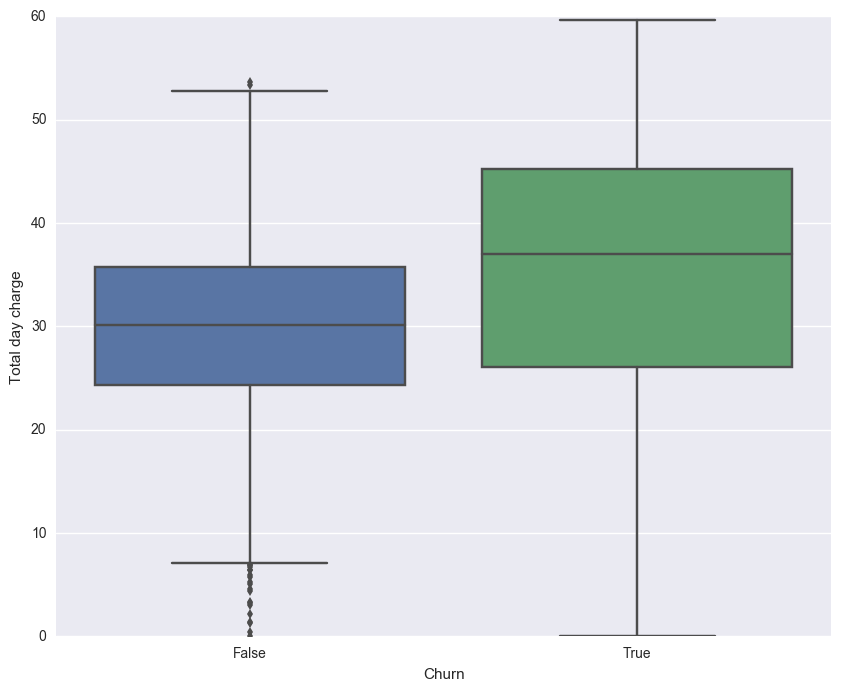

In [37]:
sns.boxplot(x='Churn', y='Total day charge', data=data)

In [38]:
from scipy.stats import ttest_ind

In [43]:
data[data['Churn'] == True]['Total day charge'].std(), \
data[data['Churn'] == False]['Total day charge'].std()

(11.729709881783512, 8.530835463259534)

In [45]:
ttest_ind(data[data['Churn'] == True]['Total day charge'],
         data[data['Churn'] == False]['Total day charge'],
         equal_var=False)

Ttest_indResult(statistic=9.684475930233658, pvalue=1.2198763860802676e-20)